# Sendy Logistics

The costs of logistics in Sub-Saharan Africa increase the costs of manufactured goods up to 320% whereas in Europe it is only 90% of the manufacturing cost. Economies are better when logistics are efficient and affordable.

Sendy is a logistics company situated in Nairobi, Kenya, established in 2014 to enable businesses of all types and sizes to transport goods more efficiently across East Africa.

<br>

***“We believe in them; we believe that logistics should be an enabler for them to achieve their goals, rather than a hindrance. We believe that everyone should be able to participate and thrive in the economy and that no small business should be left out because the cost of logistics is either too high or inaccessible.”***

<br>

The purpose of the notebook aims to help Sendy predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at final destination. This will enhance customer communication and improve the reliability of its service; which will ultimately improve customer experience. 

In addition, the solution will enable Sendy to realise cost savings, and ultimately reduce the cost of doing business, through improved resource management and planning for order scheduling.

### Objective:

The objective of this notebook is to build a model to accurately predict the arrival time of goods sent through Sendys. This will help all businesses to improve their logistics and communicate an accurate time to their customers.



### Python Libraries

***This notebook was designed with the following libraries. Should you not have them already installed, simply uncomment the cell below and run it to pip install.***

In [1103]:
# !pip install xgboost
# !pip install ipython
# !pip install plotly==4.8.1
# !pip install geopy
# !pip install cufflinks 
# !pip install plotnine
# !pip install -U ggplot

In [1104]:
#Import python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

color = sns.color_palette()
from plotnine import *



%matplotlib inline
#Packages used to display the Exploratory Data Analysis(EDA)
from pandas_profiling import ProfileReport
from IPython.display import IFrame

# Plotting interactive graphs
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
#Train_test_split used to split the x dataframe into the training set and test set
from sklearn.model_selection import train_test_split

#Training the simple and multiple linear regression model on the split data
from sklearn.linear_model import *
from statsmodels.api import OLS 
from statsmodels.api import add_constant
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import*
from sklearn.svm.classes import *
from sklearn import *
from sklearn.gaussian_process import *
from sklearn.isotonic import *
from sklearn.neighbors import *
from sklearn.neural_network import *
from sklearn.tree import *


#Training the XGBoost regression model on the split data
import xgboost as xgb
from xgboost import plot_importance
#Accuracy packages
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Import python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Packages used to display the Exploratory Data Analysis(EDA)
from pandas_profiling import ProfileReport
from IPython.display import IFrame

# Using the distance package from geopy to calculate the distance between coordinates
from geopy.distance import distance

# Train_test_split used to split the x dataframe into the training set and test set
from sklearn.model_selection import train_test_split

# Training the multiple linear regression model on the split data
from sklearn.linear_model import LinearRegression

# Training the XGBoost regression model on the split data
import xgboost as xgb
# Accuracy packages
from sklearn.metrics import mean_squared_error

### Datasets

#####  **Variable definitions**

<br>

The Variable definitions dataframe lists the column names found in the Rider, Train, Test and Sample Submissions dataframes and gives a brief description of the data found within the column.

<br> 

*Aside note:* Column names listed in this datframe may not appear the Rider, Train, Test and Sample Submissions dataframes because during the process of modelling the data, the columns may not be useful and will be removed.

In [1105]:
# Importing the VariableDefinitions.csv file from github as a Pandas DataFrame.
# Creating new column names for the Pandas DataFrame.

vardefinitions_df = pd.read_csv(
    "https://raw.githubusercontent.com/thembeks/Regression-Sendy-Logistics-Challenge-Team-14/Predict/VariableDefinitions.csv",
    names=['column_name', 'description'])

# Set the Pandas DataFrame style to display all the contents within the columns.

vardefinitions_df.style.set_properties(
    subset=['description'], **{'width': '600px'})

,column_name,description
0,Order No,Unique number identifying the order
1,User Id,Unique number identifying the customer on a platform
2,Vehicle Type,"For this competition limited to bikes, however in practice Sendy service extends to trucks and vans"
3,Platform Type,"Platform used to place the order, there are 4 types"
4,Personal or Business,Customer type
5,Placement - Day of Month,Placement - Day of Month i.e 1-31
6,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
7,Placement - Time,Placement - Time - Time of day the order was placed
8,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
9,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)


##### **Rider DataFrame**

The Rider Dataframe lists all the riders that have delivered orders for Sendy and any information pertaining to that particular rider.

In [1106]:
# Importing the Riders.csv file from github as a Pandas DataFrame.

rider_df = pd.read_csv(
    'https://raw.githubusercontent.com/thembeks/Regression-Sendy-Logistics-Challenge-Team-14/Predict/Riders.csv')

# Replacing all the blank spaces between words in the column names with an underscore.

rider_df.columns = [col.replace(' ', '_').lower()
                    for col in rider_df.columns]

# Displays the first 10 rows of the rider DataFrame to show the layout of the DataFrame.

rider_df.head(10)

,rider_id,no_of_orders,age,average_rating,no_of_ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156
5,Rider_Id_720,2608,1798,13.2,504
6,Rider_Id_95,3464,1304,13.4,950
7,Rider_Id_122,4831,2124,14.1,1469
8,Rider_Id_900,1936,1436,14.2,610
9,Rider_Id_196,550,2379,13.4,224


In [1107]:
# A Pandas method that prints the information about a DataFrame.
# The information printed: the index dtype,column dtypes, non-null values and memory usage.

rider_df.info()

# Returns a tuple representing the dimensionality of the DataFrame.

rider_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
rider_id          960 non-null object
no_of_orders      960 non-null int64
age               960 non-null int64
average_rating    960 non-null float64
no_of_ratings     960 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


(960, 5)

##### **Training set DataFrame**

In [1108]:
# Importing the Train.csv file from github as a Pandas DataFrame.

train_df = pd.read_csv(
    'https://raw.githubusercontent.com/thembeks/Regression-Sendy-Logistics-Challenge-Team-14/Predict/Train.csv')

# Replacing all the blank spaces between words in the column names with an underscore.

train_df.columns = [col.replace(' ', '_').lower()
                    for col in baseline_train_df.columns]

# Displays the first 10 rows of the rider DataFrame to show the layout of the DataFrame.

train_df.head(10)

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement_-_day_of_month,placement_-_weekday_(mo_=_1),placement_-_time,confirmation_-_day_of_month,confirmation_-_weekday_(mo_=_1),...,arrival_at_destination_-_time,distance_(km),temperature,precipitation_in_millimeters,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,time_from_pickup_to_arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214
5,Order_No_7408,User_Id_1342,Bike,3,Business,14,5,3:07:35 PM,14,5,...,4:23:41 PM,9,27.2,NaN,-1.302583,36.767081,-1.257309,36.806008,Rider_Id_124,3191
6,Order_No_22680,User_Id_2803,Bike,3,Business,9,5,9:33:45 AM,9,5,...,10:19:45 AM,5,20.3,NaN,-1.279395,36.825364,-1.276574,36.851365,Rider_Id_114,1380
7,Order_No_21578,User_Id_1075,Bike,3,Business,11,1,2:13:01 PM,11,1,...,2:33:26 PM,3,28.7,NaN,-1.252796,36.800313,-1.255189,36.782203,Rider_Id_913,646
8,Order_No_5234,User_Id_733,Bike,3,Business,30,2,11:10:44 AM,30,2,...,1:19:35 PM,9,NaN,NaN,-1.255189,36.782203,-1.300255,36.825657,Rider_Id_394,3398
9,Order_No_1768,User_Id_2112,Bike,3,Business,23,5,4:48:54 PM,23,5,...,6:31:57 PM,14,24.6,NaN,-1.225322,36.808550,-1.215601,36.891686,Rider_Id_660,3439


In [1109]:
# A Pandas method that prints the information about a DataFrame.
# The information printed: the index dtype,column dtypes, non-null values and memory usage.

train_df.info()

# Returns a tuple representing the dimensionality of the DataFrame.
train_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
order_no                                     21201 non-null object
user_id                                      21201 non-null object
vehicle_type                                 21201 non-null object
platform_type                                21201 non-null int64
personal_or_business                         21201 non-null object
placement_-_day_of_month                     21201 non-null int64
placement_-_weekday_(mo_=_1)                 21201 non-null int64
placement_-_time                             21201 non-null object
confirmation_-_day_of_month                  21201 non-null int64
confirmation_-_weekday_(mo_=_1)              21201 non-null int64
confirmation_-_time                          21201 non-null object
arrival_at_pickup_-_day_of_month             21201 non-null int64
arrival_at_pickup_-_weekday_(mo_=_1)         21201 non-null int64
arrival_at_pickup_-_time   

(21201, 29)

#####  **Testing set DataFrame**

In [1110]:
# Importing the Test.csv file from github as a Pandas DataFrame.

test_df = pd.read_csv(
    'https://raw.githubusercontent.com/thembeks/Regression-Sendy-Logistics-Challenge-Team-14/Predict/Test.csv')

# Replacing all the blank spaces between words in the column names with an underscore.

test_df.columns = [col.replace(' ', '_').lower()
                   for col in baseline_test_df.columns]

# Displays the first 10 rows of the rider DataFrame to show the layout of the DataFrame.

test_df.head(10)

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement_-_day_of_month,placement_-_weekday_(mo_=_1),placement_-_time,confirmation_-_day_of_month,confirmation_-_weekday_(mo_=_1),...,pickup_-_weekday_(mo_=_1),pickup_-_time,distance_(km),temperature,precipitation_in_millimeters,pickup_lat,pickup_long,destination_lat,destination_long,rider_id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858
5,Order_No_14573,User_Id_2338,Bike,1,Personal,13,1,6:29:29 PM,13,1,...,1,6:39:02 PM,16,19.3,NaN,-1.256606,36.795974,-1.223983,36.898452,Rider_Id_452
6,Order_No_6731,User_Id_488,Bike,2,Personal,17,3,9:53:29 AM,17,3,...,3,10:08:00 AM,18,20.9,NaN,-1.225272,36.875672,-1.304713,36.808955,Rider_Id_704
7,Order_No_18436,User_Id_3764,Bike,3,Business,28,4,8:51:13 AM,28,4,...,4,8:58:53 AM,8,22.7,NaN,-1.273539,36.833775,-1.297299,36.789446,Rider_Id_62
8,Order_No_2288,User_Id_2866,Bike,3,Business,28,4,8:58:21 AM,28,4,...,4,9:30:35 AM,8,19.4,NaN,-1.255189,36.782203,-1.285770,36.759172,Rider_Id_177
9,Order_No_9063,User_Id_1329,Bike,3,Business,4,5,4:28:28 PM,4,5,...,5,4:44:01 PM,15,21.7,NaN,-1.273056,36.811298,-1.330552,36.714289,Rider_Id_674


In [1111]:
# A Pandas method that prints the information about a DataFrame.
# The information printed: the index dtype,column dtypes, non-null values and memory usage.

test_df.info()

# Returns a tuple representing the dimensionality of the DataFrame.

test_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
order_no                                7068 non-null object
user_id                                 7068 non-null object
vehicle_type                            7068 non-null object
platform_type                           7068 non-null int64
personal_or_business                    7068 non-null object
placement_-_day_of_month                7068 non-null int64
placement_-_weekday_(mo_=_1)            7068 non-null int64
placement_-_time                        7068 non-null object
confirmation_-_day_of_month             7068 non-null int64
confirmation_-_weekday_(mo_=_1)         7068 non-null int64
confirmation_-_time                     7068 non-null object
arrival_at_pickup_-_day_of_month        7068 non-null int64
arrival_at_pickup_-_weekday_(mo_=_1)    7068 non-null int64
arrival_at_pickup_-_time                7068 non-null object
pickup_-_day_of_month                   7068 n

(7068, 25)

#####  **Sample submission DataFrame**

This database is the format in which we will submit our predicted test values to Zindi.

In [1112]:
# Importing the SampleSumbmission.csv file from github as a Pandas DataFrame.

samplesubmission_df = pd.read_csv(
    'https://raw.githubusercontent.com/thembeks/Regression-Sendy-Logistics-Challenge-Team-14/Predict/SampleSubmission.csv')

# Replacing all the blank spaces between words in the column names with an underscore.

samplesubmission_df.columns = [col.replace(' ', '_').lower()
                               for col in samplesubmission_df.columns]

# Displays the first 10 rows of the rider DataFrame to show the layout of the DataFrame.

samplesubmission_df.head(10)

,order_no,time_from_pickup_to_arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN
5,Order_No_14573,NaN
6,Order_No_6731,NaN
7,Order_No_18436,NaN
8,Order_No_2288,NaN
9,Order_No_9063,NaN


#####  **Merged DataFrame**

<br>

The merged DataFrame will consist of the Training/Test DataFrame merged with the Rider DataFrame. This DataFrame will be used for the data transformation and modelling.

###### train_df DataFrame

In [1113]:
# Merge the train and rider DataFrame using Pandas .merge() function
# Training datasets


train_df = pd.merge(train_df, rider_df, on='rider_id')

# Reorder columns so that the dependent variable is at the end.

train_df = train_df[['order_no', 'user_id', 'vehicle_type', 'platform_type', 'personal_or_business',
                     'placement_-_day_of_month', 'placement_-_weekday_(mo_=_1)', 'placement_-_time',
                     'confirmation_-_day_of_month', 'confirmation_-_weekday_(mo_=_1)',
                     'confirmation_-_time', 'arrival_at_pickup_-_day_of_month',
                     'arrival_at_pickup_-_weekday_(mo_=_1)', 'arrival_at_pickup_-_time',
                     'pickup_-_day_of_month', 'pickup_-_weekday_(mo_=_1)', 'pickup_-_time',
                     'arrival_at_destination_-_day_of_month', 'arrival_at_destination_-_weekday_(mo_=_1)',
                     'arrival_at_destination_-_time', 'distance_(km)', 'temperature',
                     'precipitation_in_millimeters', 'pickup_lat', 'pickup_long', 'destination_lat',
                     'destination_long', 'rider_id', 'no_of_orders', 'age', 'average_rating',
                     'no_of_ratings', 'time_from_pickup_to_arrival']]

# Renaming the columns to make working with the DataFrames easier.

train_df.columns = ['order_no', 'user_id', 'vehicle_type', 'platform_type', 'personal_or_business',
                    'placement(DOM)', 'placement(weekday)', 'placement(time)', 'confirmation(DOM)',
                    'confirmation(weekday)', 'confirmation(time)', 'arrival_at_pickup(DOM)',
                    'arrival_at_pickup(weekday)', 'arrival_at_pickup(time)', 'pickup(DOM)',
                    'pickup(weekday)', 'pickup(time)', 'arrival_at_destination(DOM)',
                    'arrival_at_destination(weekday)', 'arrival_at_destination(time)', 'distance(km)',
                    'temperature', 'precipitation(mm)', 'pickup_lat', 'pickup_long', 'destination_lat',
                    'destination_long', 'rider_id', 'no_of_orders', 'age', 'average_rating',
                    'no_of_ratings', 'time_from_pickup_to_arrival']

###### test_df  DataFrame 

In [1114]:
# Merge the test and rider DataFrame using Pandas .merge() function
# Testing datasets

test_df = pd.merge(test_df, rider_df, on='rider_id')

# Renaming the columns to make working with the DataFrames easier.

test_df.columns = ['order_no', 'user_id', 'vehicle_type', 'platform_type', 'personal_or_business',
                   'placement(DOM)', 'placement(weekday)', 'placement(time)', 'confirmation(DOM)',
                   'confirmation(weekday)', 'confirmation(time)', 'arrival_at_pickup(DOM)',
                   'arrival_at_pickup(weekday)', 'arrival_at_pickup(time)', 'pickup(DOM)',
                   'pickup(weekday)', 'pickup(time)', 'distance(km)', 'temperature',
                   'precipitation(mm)', 'pickup_lat', 'pickup_long', 'destination_lat',
                   'destination_long', 'rider_id', 'no_of_orders', 'age', 'average_rating',
                   'no_of_ratings']

###### Concatenating the DataFrame

In [1115]:
# Joing the train_df and test_df into one DataFrame so the preprocessing won't have to be repeated.
# The DataFrames will be split when the preprocessing is done.

merged_df=pd.concat([train_df, test_df], sort=False)
merged_df.head()

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement(DOM),placement(weekday),placement(time),confirmation(DOM),confirmation(weekday),...,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,no_of_orders,age,average_rating,no_of_ratings,time_from_pickup_to_arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,1637,1309,13.8,549,745.0
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,5,...,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,1637,1309,13.8,549,2886.0
2,Order_No_14170,User_Id_3339,Bike,3,Business,31,5,12:51:41 PM,31,5,...,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,1637,1309,13.8,549,2615.0
3,Order_No_21727,User_Id_3523,Bike,3,Personal,2,2,7:12:10 AM,2,2,...,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,1637,1309,13.8,549,2986.0
4,Order_No_8301,User_Id_87,Bike,2,Personal,22,2,10:40:58 AM,22,2,...,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1637,1309,13.8,549,1602.0


**Alignment of datasets**

<br>

Aligning the dataset of train_df to the test_df dataset by dropping extra columns in train_df.

In [1116]:
# Using the Pandas .drop() method.
# Remove columns by specifying the column names and corresponding axis.

merged_df = merged_df.drop(['arrival_at_destination(DOM)', 'arrival_at_destination(weekday)',
                              'arrival_at_destination(time)','order_no'], axis=1)

### Exploratory Data Analysis

Exploratory Data Analysis(EDA) is an approach for data analysis that uses many tools(mainly graphical to maximize insight into a data set, extract important variables, detect outliers and anomalies, amongst other details that is missed when looking at DataFrame.


This step is very important especially when we model the data in order to apply Machine Learning techniques.

##### **Summary Statistics**

In [1117]:
# A function that performs summary statistics over a DataFrame using Pandas methods.

def train_eda(df):
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_pct'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['std'] = df.std()
    eda_df['25%'] = df.quantile(q=0.25)
    eda_df['median'] = df.median()
    eda_df['75%'] = df.quantile(q=0.75)
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()

    return pd.DataFrame(eda_df)

In [1118]:
train_eda(train_df)

,null_sum,null_pct,dtypes,count,mean,std,25%,median,75%,min,max
age,0,0.000000,int64,21201,984.742842,646.652835,495.000000,872.000000,1236.000000,96,3764
arrival_at_destination(DOM),0,0.000000,int64,21201,15.653837,8.798886,8.000000,15.000000,23.000000,1,31
arrival_at_destination(time),0,0.000000,object,21201,NaN,NaN,NaN,NaN,NaN,10:00:00 AM,9:59:57 AM
arrival_at_destination(weekday),0,0.000000,int64,21201,3.240225,1.567228,2.000000,3.000000,5.000000,1,7
arrival_at_pickup(DOM),0,0.000000,int64,21201,15.653837,8.798886,8.000000,15.000000,23.000000,1,31
arrival_at_pickup(time),0,0.000000,object,21201,NaN,NaN,NaN,NaN,NaN,10:00:00 AM,9:59:56 AM
arrival_at_pickup(weekday),0,0.000000,int64,21201,3.240225,1.567228,2.000000,3.000000,5.000000,1,7
average_rating,0,0.000000,float64,21201,13.882520,0.916071,13.600000,14.000000,14.300000,0,15.2
confirmation(DOM),0,0.000000,int64,21201,15.653837,8.798886,8.000000,15.000000,23.000000,1,31
confirmation(time),0,0.000000,object,21201,NaN,NaN,NaN,NaN,NaN,10:00:00 AM,9:59:58 AM


> Observations

- There are 21 201 rows of data and 33 columns
    - The precipitation_in_millimeters and temperature column are missing values.
        - precipitation_in_millimeters: 97.4% missing values.
        - temperature: 20.6% missing values.	
- The data types within the train_df:
    - 16 int64   
    - 7 float64   
    - 10 object
        - There are a few columns that consist of string or text values that need to be explored and cleaned before modelling.
        - Just because a type is not numeric does not mean it will not be useful or important when modelling.
        - By inspecting the columns, many are categorical or ordinal features that can be converted to numeric values through data cleaning and that they relate to the time_from pick up to arrival that we are trying to predict.
- For the object data types, returns the summary statistics as a NaN value as it cannot compute any values for the columns as it is a string.
    - It will only return the minimum and maximum values in that column.
- The mean is observed to be higher than the median and there is a big difference between the 75th percentile and the maximum value which could indicate there maybe be outliers within the dataset.


##### **Unique values**

In [1119]:
# Function that counts all the unique values in a DataFrame and returns it in a new DataFrame.
# New DataFrame sorts the data in ascending order.

def train_unique(df):
    unique_df = {}

    unique_df['no_of_unique_values'] = train_df[['vehicle_type', 'platform_type', 'personal_or_business',
                                                 'distance(km)', 'temperature', 'precipitation(mm)',
                                                 'average_rating']].nunique()

    unique_df = pd.DataFrame(unique_df).sort_values(
        by=['no_of_unique_values']).rename_axis('column_name').reset_index()

    return unique_df

def train_unique1(df):
    unique_df1 = {}

    unique_df1['no_of_unique_values'] = train_df[['no_of_ratings', 'age', 'no_of_orders', 'rider_id',
                                                  'user_id', 'order_no']].nunique()

    unique_df1 = pd.DataFrame(unique_df1).sort_values(
        by=['no_of_unique_values']).rename_axis('column_name').reset_index()

    return unique_df1

# Create an interactive visual to display the unique values of the above DataFrame,
# Spilt into two visuals because the differences between unique values is large.

data = px.data.gapminder()
data1 = train_unique(train_df)
fig = px.bar(data1, x='no_of_unique_values',
             y='column_name', color='no_of_unique_values',
             labels={'no_of_unique_values': 'Unique values',
                     'column_name': 'Column Name'}, 
             height=400)
fig.show()

data2 = px.data.gapminder()
data3 = train_unique1(train_df)
fig = px.bar(data3, x='no_of_unique_values',
             y='column_name', color='no_of_unique_values',
             labels={'no_of_unique_values': 'Unique values', 
                     'column_name': 'Column Name'},
             height=400)
fig.show()

- There is only one vehicle type used to in the dataset to make deliveries which is a bike.
- In the dataset, there is 21 201 order numbers which means there are no repeated values.
    - It is like the ID column for the dataset.
- There are currently 3 186 customers that use Sendy's services which means that customers have repeatly used Sendy's services. 
- 924 riders are currently making deliveries for Sendy, which indicates that Sendy repeatedly makes use of the same riders to make deliveries.

In [1120]:
# Bargraph displaying the most common distance travelled for order deliveries

train_df['distance(km)'].value_counts().iplot(kind='bar', 
                                              bins=30, 
                                              theme='white', 
                                              color= 'purple',
                                              title='Total distance travelled per order', 
                                              xTitle='Distance(km)', 
                                              yTitle='Count')

# Box plot displaying the distribution of the data via the relatioships between percentiles.

train_df['distance(km)'].iplot(kind='box', color= 'darkblue')

- The minimum distance travelled in 1km and the maximum distance travelled is 49km.
- The mean distance travelled is 9.5km which is above the median distance travelled of 8km.
- From the above graphs, we can see that there are a lot of outliers in the database.
    - It may effect on the model since distance has shown to have the highest correlation with the dependent variable.  
- 75% of the orders in our dataset are delivered within a distance of 13km which means that our data is heavily skewed to the right. 

In [1121]:
# Bargraph displaying the most common platform types used to place orders.

train_df['platform_type'].value_counts().iplot(kind='bar', 
                                               bins= 10, 
                                               theme='white', 
                                               color= 'purple',
                                               title='Most common platform types used to place orders', 
                                               xTitle='Platform Types', 
                                               yTitle='Count')

- There are 4 types of platform types, the most common being platform 3 and the least platform 4.
- Platform 3 is the median and modal values.
- From the above graph the, we can see the dataset is not evenly distributed.

In [1122]:
# Bargraph displaying who makes use of Sendy's services the most.

train_df['personal_or_business'].value_counts().iplot(kind='bar', 
                                                      bins= 10, 
                                                      theme='white', 
                                                      color= 'purple',
                                                      title='Who uses Sendys services the most?', 
                                                      xTitle='Personal or Business', 
                                                      yTitle='Count')

- More that 50% of the Sendy's orders come from Business'.
    - Business is the median and modal value of the dataset.

In [1123]:
# Bargraph displaying who makes use of Sendy's services the most.

train_df['user_id'].value_counts().iplot(kind='bar', 
                                         bins= 50, 
                                         theme='white', 
                                         color= 'purple',
                                         title='Who uses Sendys services the most?', 
                                         xTitle='User ID',
                                         yTitle='Count')

- From the above graph, we can see that user_id_393 placed the most orders at 645 which is also the modal value.
- Many of sendy's customers have made atleast 2 orders with Sendy. 

In [1124]:
# Bargraph displaying who makes use of Sendy's services the most.

train_df['rider_id'].value_counts().iplot(kind='bar', 
                                          bins= 50, 
                                          theme='white', 
                                          color= 'purple',
                                          title='How many times each Rider has made deliveries for Sendy?', 
                                          xTitle='Rider ID',
                                          yTitle='Count')

- rider_id_726 has made the most deliveries for Sendy at 247 which is also the modal value of the datset. 
- Many of the delivery personnel have made atleast 1 delivery for Sendy. 

##### **Busiest days for orders**

In [1125]:
# Function that counts the number of unique values per category and returns it in a new DataFrame.
# New DataFrame sorts the data in days starting from the first of the month.

def train_countm(df):
    countm_df = {}

    countm_df['placement(DOM)'] = train_df['placement(DOM)'].value_counts()
    countm_df['confirmation(DOM)'] = train_df['confirmation(DOM)'].value_counts()
    countm_df['arrival_at_pickup(DOM)'] = train_df['arrival_at_pickup(DOM)'].value_counts()
    countm_df['pickup(DOM)'] = train_df['pickup(DOM)'].value_counts()
    countm_df['arrival_at_destination_-(DOM)'] = train_df['arrival_at_destination(DOM)'].value_counts()

    countm_df = pd.DataFrame(countm_df).rename_axis('day')

    return countm_df

In [1126]:
train_countm(train_df)

,placement(DOM),confirmation(DOM),arrival_at_pickup(DOM),pickup(DOM),arrival_at_destination_-(DOM)
day,,,,,
1,482,482,482,482,482
2,602,602,602,602,602
3,718,718,718,718,718
4,769,769,769,769,769
5,747,747,747,747,747
6,794,794,794,794,794
7,822,822,822,822,822
8,848,848,848,848,848
9,667,667,667,667,667


- From the above table, we can see that that from the placement day of the month to the arrival destination day that the are all the same value.
    - This could indicate that there is a direct correlation between all of these values. 

In [1127]:
# A function that groups the days of the month by weeks

def group_by_week(df, column_name):
    values = []
    for row in range(len(df)):
        if df[column_name][row] <= 7:
            values.append(1)
        if df[column_name][row] <= 14:
            values.append(2)
        if df[column_name][row] <= 21:
            values.append(3)
        if df[column_name][row] <= 28:
            values.append(4)
        else:
            values.append(5)
    values = pd.DataFrame(values)
    
    return pd.DataFrame(values.iloc[:,0].value_counts().sort_index())

# Bargraph displaying the busiest weeks for deliveries 

group_by_week(train_df, 'placement(DOM)').iplot(kind='bar', 
                                          bins= 50, 
                                          theme='white', 
                                          color= 'purple',
                                          title='The busiest weeks in a month for orders', 
                                          xTitle='Weeks',
                                          yTitle='Count')


- The busiest weeks for deliveries is the fourth week.
    - This makes sense because it's month end and many people have the money to buy and have things delivered. 
    - Week for is also the modal value.

In [1128]:
# Bargraph displaying the busiest day of the week for deliveries.

train_df['placement(weekday)'].value_counts().iplot(kind='bar', 
                                          bins= 50, 
                                          theme='white', 
                                          color= 'purple',
                                          title='The busiest days of the week for Sendy', 
                                          xTitle='Days Of The Week',
                                          yTitle='Count')

- From the above graph, Thursday is the busiest day of the week and in second comes friday.
    - I assume this is due to the many people would like their packages delivered before the weekend.
- The least busiest time would be the weekend.

##### **The behaviour of delivery time (Dependent Variable)**

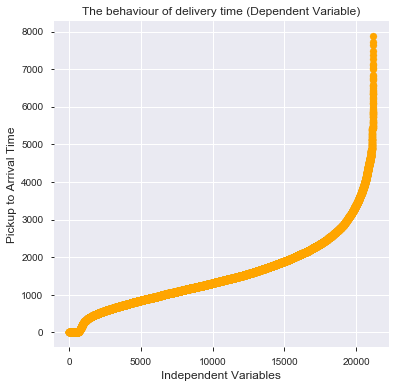

In [1129]:
plt.figure(figsize=(6,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.time_from_pickup_to_arrival.values), color = 'orange')
plt.xlabel('Independent Variables', fontsize=12)
plt.ylabel('Pickup to Arrival Time', fontsize=12)
plt.title('The behaviour of delivery time (Dependent Variable)')
plt.show()

##### **Correlations**

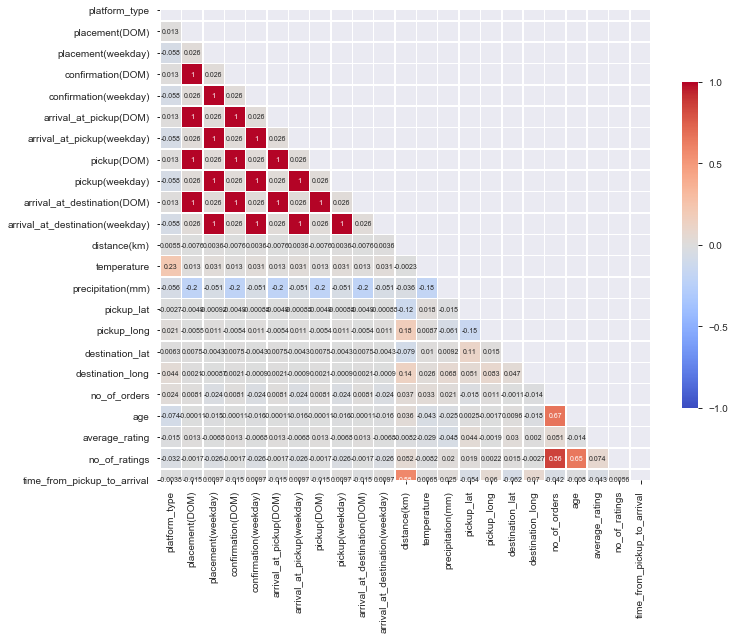

In [1130]:
f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 7})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

##### **Geoplots**

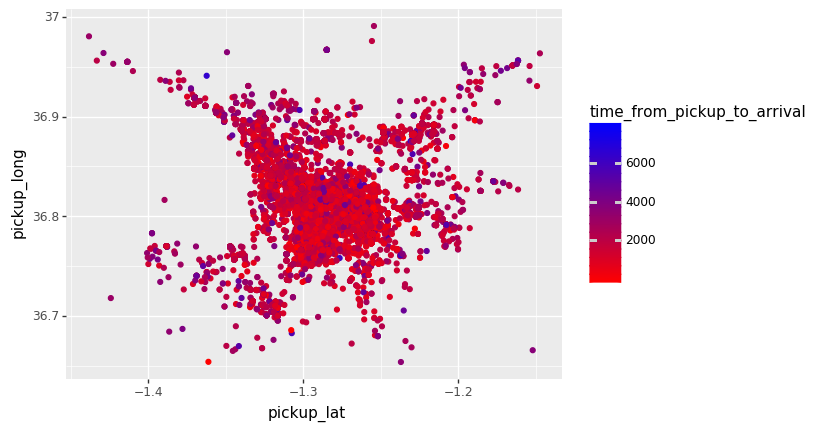

<ggplot: (-9223371889877100356)>

In [1131]:
ggplot(aes(x='pickup_lat', y='pickup_long', color= 'time_from_pickup_to_arrival'), data=train_df) + \
    geom_point() + \
    scale_color_gradient(low = 'red', high = 'blue')

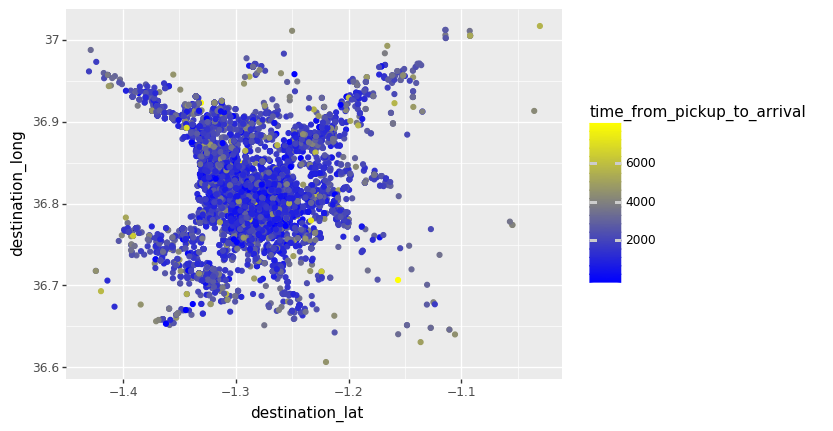

<ggplot: (-9223371889873013664)>

In [1132]:
ggplot(aes(x='destination_lat', y='destination_long', color= 'time_from_pickup_to_arrival'), data=train_df) + \
    geom_point() + \
    scale_color_gradient(low = 'blue', high = 'yellow')


The distance of drop-offs are wider spread than pick up points, many destinations arrival time will be influenced by wider distances. We also notice that lengthy times for deliveries occur in both the central and outlier destinations. Traffic congestion and distance are all influential in the pick to arrival time duration

##### **Quick Analysis**

In [1133]:
# Quick profile analysis over the train_df DataFrame.
# Pandas Profile Report using pandas_profiling library.

profile_train_df = ProfileReport(train_df, check_correlation=True)
profile_train_df.to_file(outputfile='output.html')
HtmlFile = open('output.html', 'r', encoding='utf-8')
source_code = HtmlFile.read()

IFrame(src='./output.html', width=900, height=800)

# Part 1: Baseline Model

For the purpose of Part 1, minimal feature engineering will be done to the dataset. It will be done to the extent that the data will be able to fit into a model as it.


### Transformation and Processing of data

> **Missing data**

In [1134]:
# Using the Pandas .replace() method, replace all NaN values with 0.

merged_df = merged_df.replace(np.nan, 0)

> **Converting time into seconds**

In [1135]:
# Converting time strings to seconds using the Pandas .to_timedelta() method.
# Using the .dt accessor object for datetimelike properties of the Series values to convert to seconds.

merged_df['placement(time)'] = pd.to_timedelta(
    merged_df['placement(time)']).dt.total_seconds()

merged_df['confirmation(time)'] = pd.to_timedelta(
    merged_df['confirmation(time)']).dt.total_seconds()

merged_df['arrival_at_pickup(time)'] = pd.to_timedelta(
    merged_df['arrival_at_pickup(time)']).dt.total_seconds()

merged_df['pickup(time)'] = pd.to_timedelta(
    merged_df['pickup(time)']).dt.total_seconds()

> **Dropping columns**

In [1136]:
# Using the Pandas .drop() method.
# Remove columns that are not useful by specifying the column names and corresponding axis.

merged_df = merged_df.drop(['user_id', 'vehicle_type', 'rider_id'], axis=1)

> **Encoding categorical data**

In [1137]:
# Encoding categorical data using Pandas .get_dummies() method.

merged_df = pd.get_dummies(merged_df, columns=[
                            'platform_type', 'personal_or_business'], 
                             drop_first=True)

> **How the DataFrame looks after the data transformation process**

In [1138]:
# Displays the first 10 rows of the merged DataFrame to show the layout of the DataFrame.

merged_df.head(10)

,placement(DOM),placement(weekday),placement(time),confirmation(DOM),confirmation(weekday),confirmation(time),arrival_at_pickup(DOM),arrival_at_pickup(weekday),arrival_at_pickup(time),pickup(DOM),...,destination_long,no_of_orders,age,average_rating,no_of_ratings,time_from_pickup_to_arrival,platform_type_2,platform_type_3,platform_type_4,personal_or_business_Personal
0,9,5,34546.0,9,5,34810.0,9,5,36287.0,9,...,36.829741,1637,1309,13.8,549,745.0,0,1,0,0
1,18,5,13277.0,18,5,13290.0,18,5,14836.0,18,...,36.904295,1637,1309,13.8,549,2886.0,0,1,0,1
2,31,5,46301.0,31,5,4369.0,31,5,4802.0,31,...,36.818206,1637,1309,13.8,549,2615.0,0,1,0,0
3,2,2,25930.0,2,2,25949.0,2,2,27324.0,2,...,36.802061,1637,1309,13.8,549,2986.0,0,1,0,1
4,22,2,38458.0,22,2,38544.0,22,2,39360.0,22,...,36.752427,1637,1309,13.8,549,1602.0,1,0,0,1
5,29,3,44083.0,29,3,44151.0,29,3,44514.0,29,...,36.892534,1637,1309,13.8,549,2313.0,0,1,0,0
6,2,2,32922.0,2,2,32937.0,2,2,33265.0,2,...,36.800577,1637,1309,13.8,549,1638.0,0,0,0,0
7,19,5,15176.0,19,5,15379.0,19,5,16234.0,19,...,36.821382,1637,1309,13.8,549,1897.0,0,0,0,1
8,28,1,10990.0,28,1,11078.0,28,1,12045.0,28,...,36.871900,1637,1309,13.8,549,1698.0,0,0,0,1
9,14,4,9778.0,14,4,9877.0,14,4,11100.0,14,...,36.865718,1637,1309,13.8,549,2693.0,0,1,0,0


In [1139]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28269 entries, 0 to 7067
Data columns (total 28 columns):
placement(DOM)                   28269 non-null int64
placement(weekday)               28269 non-null int64
placement(time)                  28269 non-null float64
confirmation(DOM)                28269 non-null int64
confirmation(weekday)            28269 non-null int64
confirmation(time)               28269 non-null float64
arrival_at_pickup(DOM)           28269 non-null int64
arrival_at_pickup(weekday)       28269 non-null int64
arrival_at_pickup(time)          28269 non-null float64
pickup(DOM)                      28269 non-null int64
pickup(weekday)                  28269 non-null int64
pickup(time)                     28269 non-null float64
distance(km)                     28269 non-null int64
temperature                      28269 non-null float64
precipitation(mm)                28269 non-null float64
pickup_lat                       28269 non-null float64
pickup_long   

###### **Splitting the data**

> Separating the Training dataset into the Independent variable and Dependent variable.

In [1140]:
# Splitting the baseline_train DataFrame into the X and Y variable using the Pandas .iloc[] method.

Y = merged_df[:len(train_df)][['time_from_pickup_to_arrival']]
X = merged_df[:len(train_df)].drop('time_from_pickup_to_arrival',axis=1)

# for predictions
Xtrain = merged_df[:len(train_df)].drop('time_from_pickup_to_arrival',axis=1)
Xpred = merged_df[len(train_df):].drop('time_from_pickup_to_arrival',axis=1)


> **Splitting the dataset into the training and test set**

In [1141]:
# Using sklearn.model_selection, train_test_split() method to split the baseline_X and baseline_Y.
# Test size will be 0.2 (20% of the data will the test case).

baseline_Xtrain, baseline_Xtest, baseline_Ytrain, baseline_Ytest = train_test_split(
    X, Y, 
    test_size=0.2, 
    random_state=21)

### Multiple models 

In [1142]:
names = ['Linear', 'Lasso' , 'Ridge' , 'Elastic Net',  'Random Forest Regressor' , 'XGboost',
         'DecisonTree' ]

In [1143]:
regressors = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    ElasticNet(),
    RandomForestRegressor(),
    xgb.XGBRegressor(),
    DecisionTreeRegressor()
   ] 

In [1144]:
results = []
models = {}
for name, reg in zip(names, regressors):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o reg.fit(baseline_Xtrain, baseline_Ytrain)
    
    print ('... predicting')
    y_pred = reg.predict(baseline_Xtest)   
        
    print ('... scoring')
    rsme  = np.sqrt(mean_squared_error(baseline_Ytest, y_pred))
        
    # save the results to dictionaries
    models[name] = reg    
    
    results.append([name, rsme, run_time.best])
    
results = pd.DataFrame(results, columns=['Regressor', 'RSME', 'Train Time'])
results.set_index('Regressor', inplace= True)

Fitting Linear model...
... predicting
... scoring
Fitting Lasso model...
... predicting
... scoring
Fitting Ridge model...
... predicting
... scoring
Fitting Elastic Net model...
... predicting
... scoring
Fitting Random Forest Regressor model...


C:\Users\Suzzy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expect

... predicting
... scoring
Fitting XGboost model...
[15:45:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:45:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
... predicting
... s

In [1145]:
results.sort_values('RSME', ascending=False)

,RSME,Train Time
Regressor,,
DecisonTree,1094.462153,0.302460
Random Forest Regressor,802.213257,1.938657
Elastic Net,790.987559,0.219090
Lasso,790.099700,0.029750
Linear,788.899202,0.009570
Ridge,788.720233,0.006975
XGboost,756.024888,1.046908


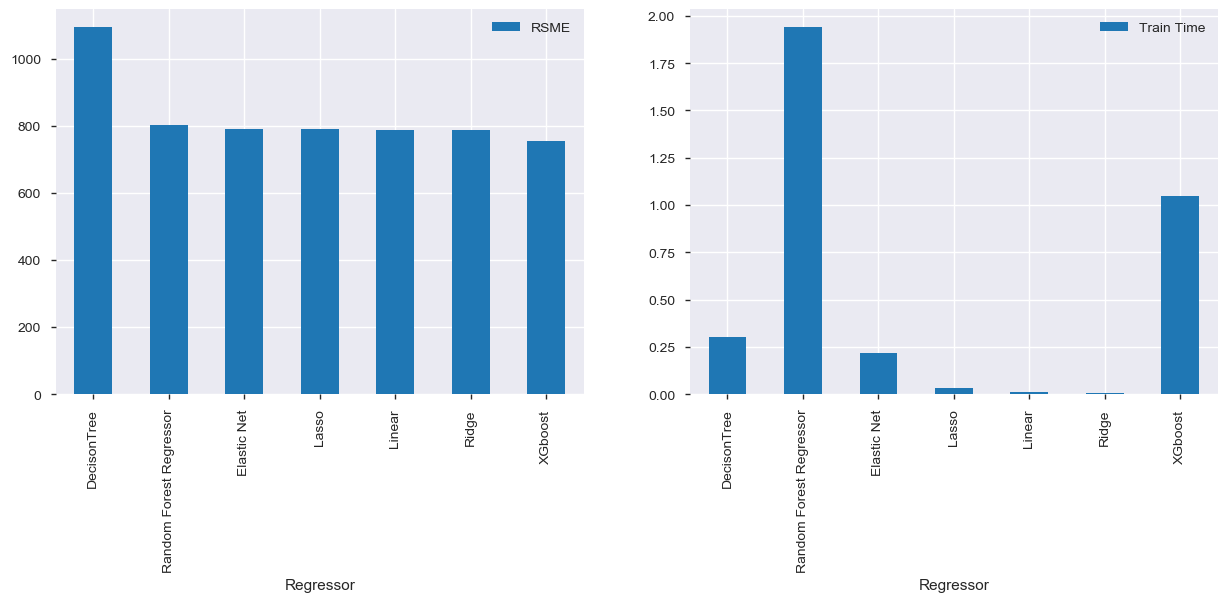

In [1146]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
results.sort_values('RSME', ascending=False, inplace=True)
results.plot(y=['RSME'], kind='bar', ax=ax[0], xlim=[0,1.1])
results.plot(y='Train Time', kind='bar', ax=ax[1])

# Part 2: Model Enhancements

For the purpose of Part 2, the minimal feature engineering that was done in Part 1 will be used where we select certain features which that has the biggest influence on the models.

### Feature Importance

##### XGB Analysis

[15:46:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


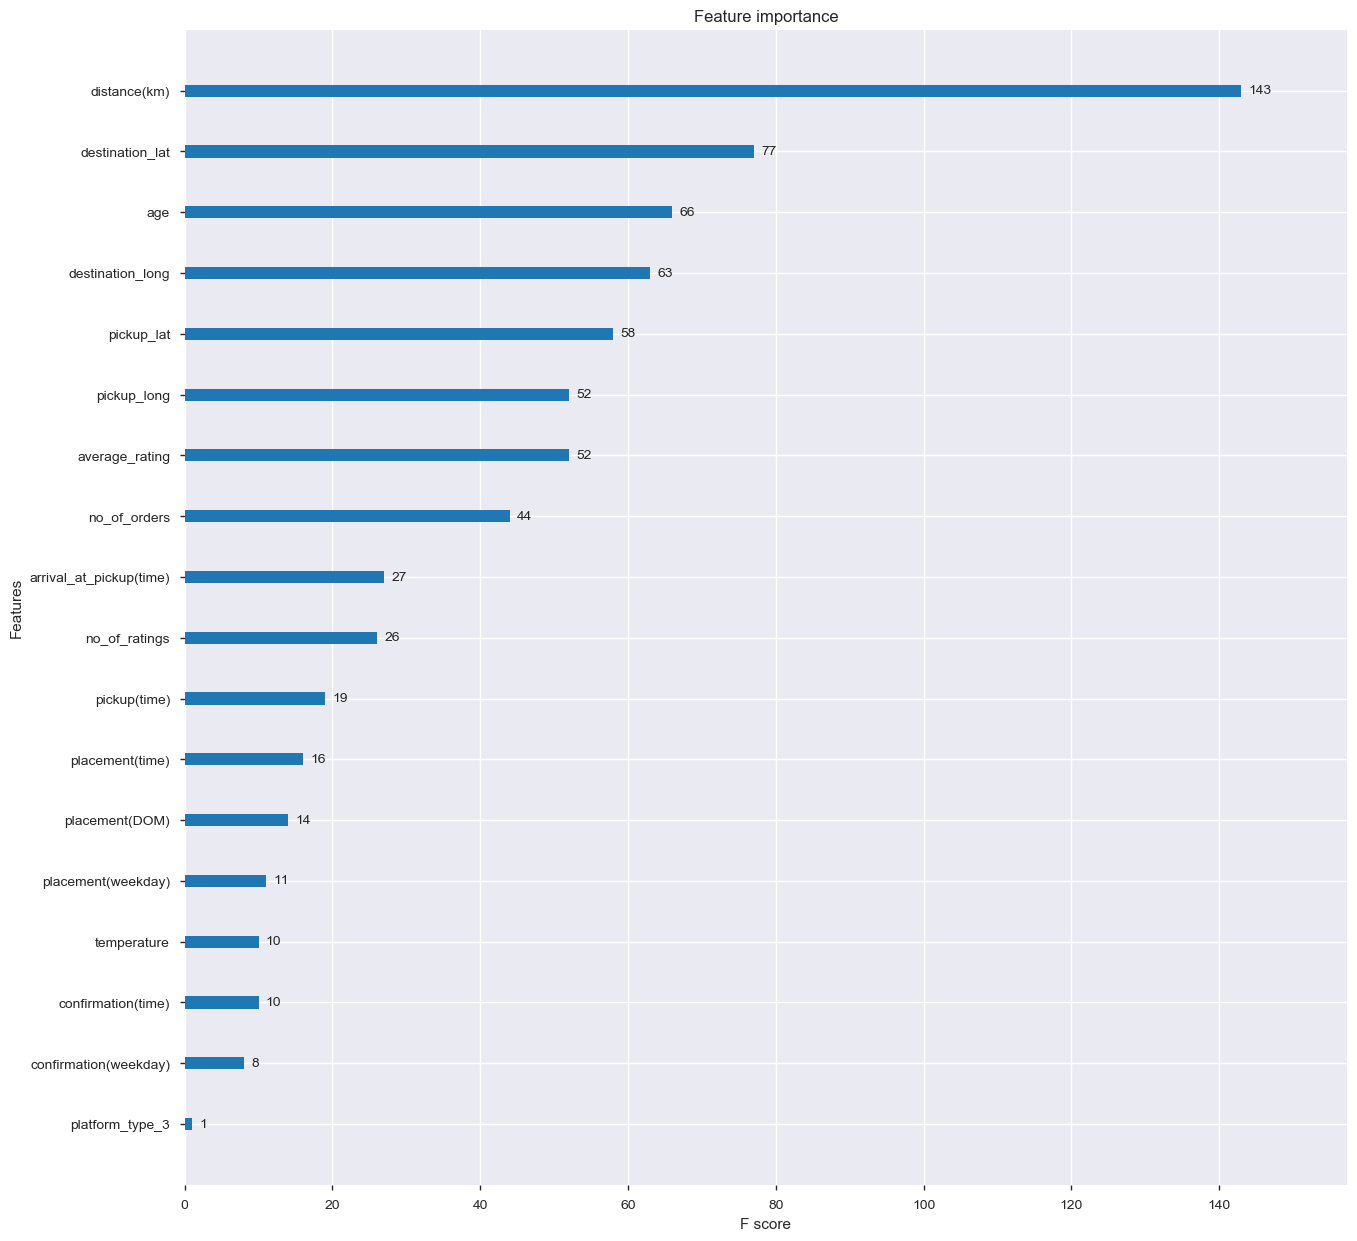

In [1147]:
baseline_xgbregression= xgb.XGBRegressor()

plt.rcParams["figure.figsize"] = (15, 15)
plot_importance(baseline_xgbregression.fit(baseline_Xtrain, baseline_Ytrain))
plt.show()

From the above graph, we can see the feature importance for XGB regression. 
    - The important features are: distance(km), destination_lat, destination_long, age, 
                           pickup_lat, pickup_long,average_rating and the no_of_orders. 
Therefore, we will aplly the above regression model to only these selected features and see if it will make any difference to the RMSE score.

###### **Splitting the dataset**

In [1148]:
# Splitting the baseline_train DataFrame into the X and Y variable using the Pandas .iloc[] method.

xgb_Y = merged_df[:len(train_df)][['time_from_pickup_to_arrival']]
xgb_X = merged_df[:len(train_df)].drop(['placement(DOM)', 'placement(weekday)', 'placement(time)',
                                   'confirmation(DOM)', 'confirmation(weekday)', 'confirmation(time)',
                                    'arrival_at_pickup(DOM)', 'arrival_at_pickup(weekday)',
                                    'arrival_at_pickup(time)', 'pickup(DOM)', 'pickup(weekday)',
                                    'pickup(time)', 'temperature', 'precipitation(mm)',
                                    'no_of_ratings', 'time_from_pickup_to_arrival', 'platform_type_2',
                                    'platform_type_3', 'platform_type_4', 
                                    'personal_or_business_Personal'],axis=1)

# for predictions
xgb_Xtrain = merged_df[:len(train_df)].drop(['placement(DOM)', 'placement(weekday)', 'placement(time)',
                                   'confirmation(DOM)', 'confirmation(weekday)', 'confirmation(time)',
                                    'arrival_at_pickup(DOM)', 'arrival_at_pickup(weekday)',
                                    'arrival_at_pickup(time)', 'pickup(DOM)', 'pickup(weekday)',
                                    'pickup(time)', 'temperature', 'precipitation(mm)',
                                    'no_of_ratings', 'time_from_pickup_to_arrival', 'platform_type_2',
                                    'platform_type_3', 'platform_type_4', 
                                    'personal_or_business_Personal'],axis=1)
xgb_Xpred = merged_df[len(train_df):].drop(['placement(DOM)', 'placement(weekday)', 'placement(time)',
                                   'confirmation(DOM)', 'confirmation(weekday)', 'confirmation(time)',
                                    'arrival_at_pickup(DOM)', 'arrival_at_pickup(weekday)',
                                    'arrival_at_pickup(time)', 'pickup(DOM)', 'pickup(weekday)',
                                    'pickup(time)', 'temperature', 'precipitation(mm)',
                                    'no_of_ratings', 'time_from_pickup_to_arrival', 'platform_type_2',
                                    'platform_type_3', 'platform_type_4', 
                                    'personal_or_business_Personal'], axis=1)

In [1149]:
# Using sklearn.model_selection, train_test_split() method to split the baseline_X and baseline_Y.
# Test size will be 0.2 (20% of the data will the test case).

baseline_Xtrain, baseline_Xtest, baseline_Ytrain, baseline_Ytest = train_test_split(
    xgb_X, xgb_Y, 
    test_size=0.2, 
    random_state=21)

###### **Multiple models**

In [1150]:
results = []
models = {}
for name, reg in zip(names, regressors):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o reg.fit(baseline_Xtrain, baseline_Ytrain)
    
    print ('... predicting')
    y_pred = reg.predict(baseline_Xtest)   
        
    print ('... scoring')
    rsme  = np.sqrt(mean_squared_error(baseline_Ytest, y_pred))
        
    # save the results to dictionaries
    models[name] = reg    
    
    results.append([name, rsme, run_time.best])
    
results = pd.DataFrame(results, columns=['Regressor', 'RSME', 'Train Time'])
results.set_index('Regressor', inplace= True)

Fitting Linear model...
... predicting
... scoring
Fitting Lasso model...
... predicting
... scoring
Fitting Ridge model...
... predicting
... scoring
Fitting Elastic Net model...
... predicting
... scoring
Fitting Random Forest Regressor model...


C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column

... predicting
... scoring
Fitting XGboost model...
[15:46:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
... predicting
... s

In [1151]:
results.sort_values('RSME', ascending=False)

,RSME,Train Time
Regressor,,
DecisonTree,1073.404820,0.108147
Random Forest Regressor,806.727562,0.696838
Elastic Net,792.685313,0.005311
Lasso,791.801137,0.005148
Ridge,790.388825,0.003466
Linear,790.345250,0.004337
XGboost,756.557646,0.396597


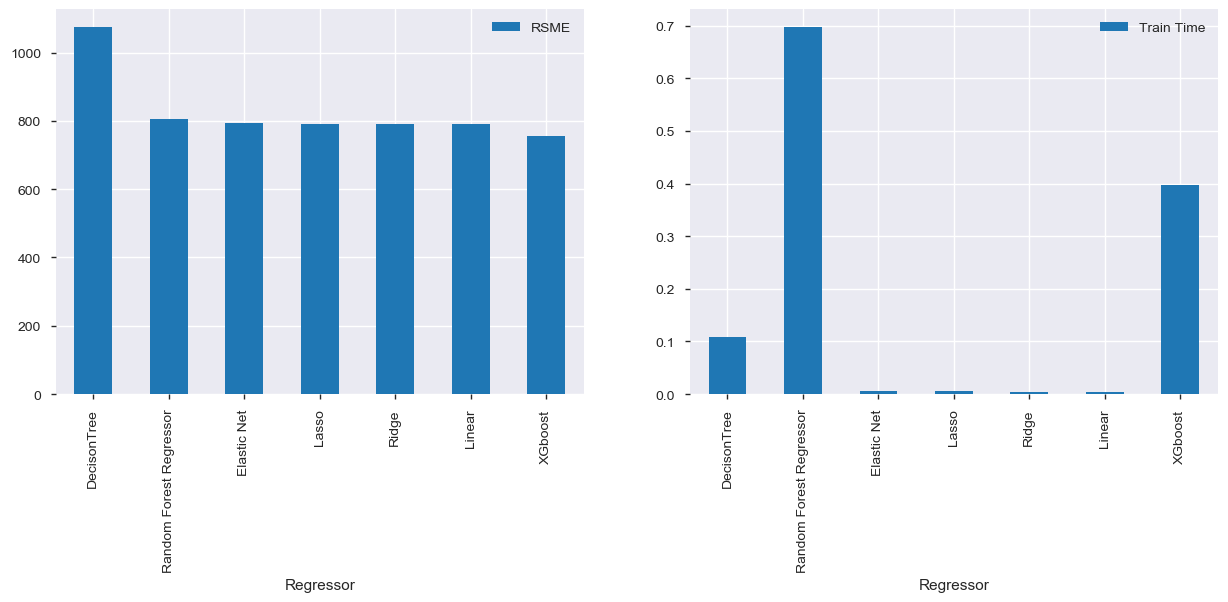

In [1152]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
results.sort_values('RSME', ascending=False, inplace=True)
results.plot(y=['RSME'], kind='bar', ax=ax[0], xlim=[0,1.1])
results.plot(y='Train Time', kind='bar', ax=ax[1])

##### P-score Analysis

In [1153]:
# Create a list of the feature names - which will be used in our final dataframe
feature_names = ['placement(DOM)', 'placement(weekday)', 'placement(time)',
       'confirmation(DOM)', 'confirmation(weekday)', 'confirmation(time)',
       'arrival_at_pickup(DOM)', 'arrival_at_pickup(weekday)',
       'arrival_at_pickup(time)', 'pickup(DOM)', 'pickup(weekday)',
       'pickup(time)', 'distance(km)', 'temperature', 'precipitation(mm)',
       'pickup_lat', 'pickup_long', 'destination_lat', 'destination_long',
       'no_of_orders', 'age', 'average_rating', 'no_of_ratings',
       'platform_type_2', 'platform_type_3', 'platform_type_4',
       'personal_or_business_Personal'
       ]

# Create a empty list g, which will be appended with information of each feature
g = []

for column in X:
    regression = OLS(Y, add_constant(X[[column]])).fit()
    regression_params = regression.params[1]
    regression_tvalues = regression.tvalues[1]
    regression_pvalues = regression.pvalues[1]
    
    g.append([regression_params, regression_tvalues, regression_pvalues])

# Create dataframe with coefficient, t statistc and p-value per feature and sort by p-value
g = pd.DataFrame(data=np.array(g).reshape([27,3]), index=feature_names, columns=['Coefficient', 't statistic', 'p value'])
g.sort_values(by='p value')

C:\Users\Suzzy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

C:\Users\Suzzy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

C:\Users\Suzzy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

C:\Users\Suzzy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

C:\Users\Suzzy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



,Coefficient,t statistic,p value
distance(km),101.115007,103.828940,0.000000e+00
destination_long,1554.731699,10.279324,9.983279e-25
destination_lat,-1754.124168,-9.025845,1.931597e-19
pickup_long,1588.298644,8.793413,1.559381e-18
pickup_lat,-1741.826542,-7.847962,4.427979e-15
average_rating,-45.867244,-6.202215,5.670363e-10
no_of_orders,-0.026093,-6.063314,1.356007e-09
temperature,1.822975,2.673379,7.514876e-03
placement(DOM),-1.650519,-2.141993,3.220540e-02
pickup(DOM),-1.649508,-2.140674,3.231173e-02


For the p-score analysis we will use a 95% confidence interval to test the feature importance.
    - The important features are: distance(km), destination_long, destination_lat, 
                     pickup_long, pickup_lat, average_rating, no_of_orders, temperature,
                     placement(DOM), pickup(DOM), confirmation(DOM) and 
                     arrival_at_pickup(DOM)

Therefore, we will aplly the above regression model to only these selected features and see if it will make any difference to the RMSE score.

###### **Splitting the dataset**

In [1154]:
# Splitting the baseline_train DataFrame into the X and Y variable using the Pandas .iloc[] method.

pscore_Y = merged_df[:len(train_df)][['time_from_pickup_to_arrival']]
pscore_X = merged_df[:len(train_df)].drop(['placement(weekday)', 'placement(time)', 
                                        'confirmation(weekday)', 'confirmation(time)',
                                        'arrival_at_pickup(DOM)', 'arrival_at_pickup(weekday)',
                                        'pickup(weekday)', 'pickup(time)', 'precipitation(mm)', 'age',
                                        'no_of_ratings', 'time_from_pickup_to_arrival', 
                                        'platform_type_2', 'platform_type_3', 'platform_type_4'], 
                                          axis=1)

# for predictions
pscore_Xtrain = merged_df[:len(train_df)].drop(['placement(weekday)', 'placement(time)', 
                                        'confirmation(weekday)', 'confirmation(time)',
                                        'arrival_at_pickup(DOM)', 'arrival_at_pickup(weekday)',
                                        'pickup(weekday)', 'pickup(time)', 'precipitation(mm)', 'age',
                                        'no_of_ratings', 'time_from_pickup_to_arrival', 
                                        'platform_type_2', 'platform_type_3', 'platform_type_4'],
                                               axis=1)
pscore_Xpred = merged_df[len(train_df):].drop(['placement(weekday)', 'placement(time)', 
                                        'confirmation(weekday)', 'confirmation(time)',
                                        'arrival_at_pickup(DOM)', 'arrival_at_pickup(weekday)',
                                        'pickup(weekday)', 'pickup(time)', 'precipitation(mm)', 'age',
                                        'no_of_ratings', 'time_from_pickup_to_arrival', 
                                        'platform_type_2', 'platform_type_3', 'platform_type_4'], 
                                              axis=1)

In [1155]:
# Using sklearn.model_selection, train_test_split() method to split the baseline_X and baseline_Y.
# Test size will be 0.2 (20% of the data will the test case).

baseline_Xtrain, baseline_Xtest, baseline_Ytrain, baseline_Ytest = train_test_split(
    pscore_X, pscore_Y, 
    test_size=0.2, 
    random_state=21)

###### **Multiple models**

In [1156]:
results = []
models = {}
for name, reg in zip(names, regressors):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o reg.fit(baseline_Xtrain, baseline_Ytrain)
    
    print ('... predicting')
    y_pred = reg.predict(baseline_Xtest)   
        
    print ('... scoring')
    rsme  = np.sqrt(mean_squared_error(baseline_Ytest, y_pred))
        
    # save the results to dictionaries
    models[name] = reg    
    
    results.append([name, rsme, run_time.best])
    
results = pd.DataFrame(results, columns=['Regressor', 'RSME', 'Train Time'])
results.set_index('Regressor', inplace= True)

Fitting Linear model...
... predicting
... scoring
Fitting Lasso model...
... predicting
... scoring
Fitting Ridge model...
... predicting
... scoring
Fitting Elastic Net model...
... predicting
... scoring
Fitting Random Forest Regressor model...


C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column

... predicting
... scoring
Fitting XGboost model...
[15:47:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:47:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:47:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:47:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:47:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
... predicting
... s

In [1157]:
results.sort_values('RSME', ascending=False)

,RSME,Train Time
Regressor,,
DecisonTree,1095.654223,0.160594
Random Forest Regressor,810.430635,1.021587
Elastic Net,792.540263,0.079663
Lasso,791.685310,0.010681
Linear,790.501028,0.005660
Ridge,790.325798,0.004527
XGboost,757.001831,0.556308


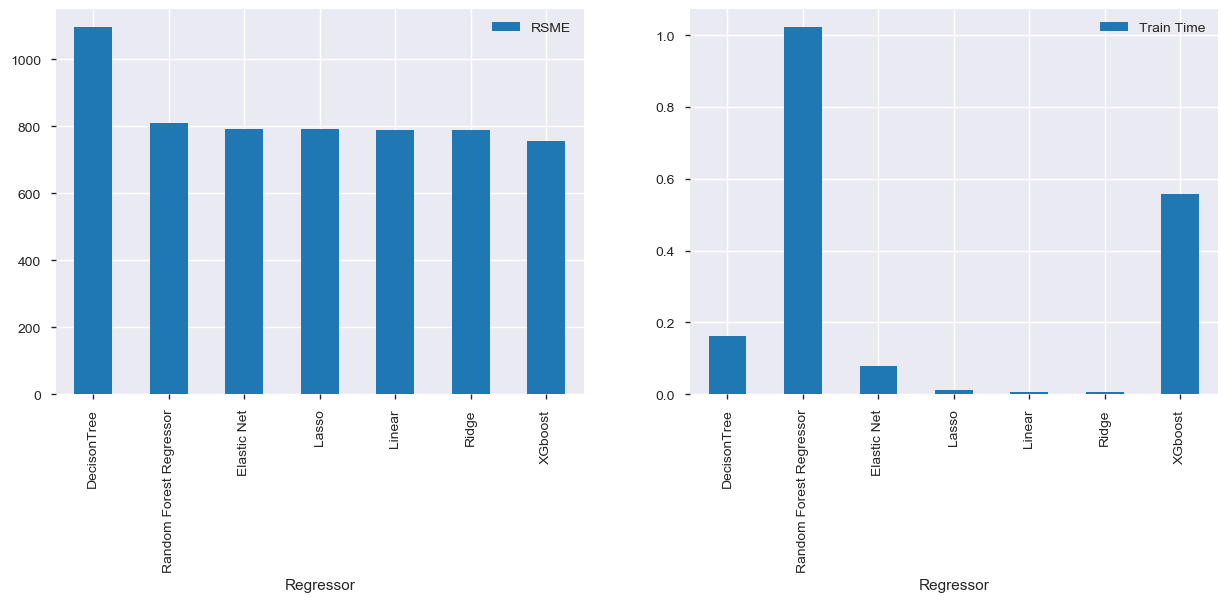

In [1158]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
results.sort_values('RSME', ascending=False, inplace=True)
results.plot(y=['RSME'], kind='bar', ax=ax[0], xlim=[0,1.1])
results.plot(y='Train Time', kind='bar', ax=ax[1])

# Part 3: Feature Engineered

### Transformation and Processing of data

> **Missing data**

**Precipitation_in_mm**

Through research, Nairobi receives an average during July (driest weather) of 19 mm  and April (wettest weather) of 206 mm of rainfall. From the Exploratory Data Analysis, we gathered the average rainfall would be 7.9mm or median would be 2.9mm which is far below the researched averages. Therefore, the Precipitaion_in_mm column would be dropped because if we were to replace the missing values with the mean or median, it may change the learning quality of the data models

In [1159]:
# Using the Pandas .drop() method.
# Remove columns that are not useful by specifying the column names and corresponding axis.

merged_df = merged_df.drop(['precipitation(mm)'], axis=1)

**Temperature**

Through research, Nairobi receives an average of between 10 degress celcius during the winter months and 29 degrees celcius during the summer months. From the Exploratory Data Analysis, the average temperature is 23.2 degrees celcius with the minimum and maximum being 11.2 and 32.1 degrees celcius respectively. This is close to the researched values. The median and modal temperature is 23.5 24.7 degrees celcuis respectively which is also close to the average temperature of the dataset. 

Since only 20.6% of the values are missing, we will fill the missing data using the mean temperature (23.2 degrees celcius) of the dataset.

In [1160]:
# Replacing NaN values using the Pandas .fillna() method with the mean of the column.

merged_df['temperature']= merged_df['temperature'].fillna(merged_df['temperature'].mean())

> **Dropping columns**

In [1161]:
# Using the Pandas .drop() method.
# Remove columns that are not useful by specifying the column names and corresponding axis.

merged_df = merged_df.drop(['confirmation(DOM)', 'confirmation(weekday)', 'arrival_at_pickup(DOM)', 
                            'arrival_at_pickup(weekday)', 'pickup(DOM)', 'pickup(weekday)'], axis=1)

In [1162]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28269 entries, 0 to 7067
Data columns (total 21 columns):
placement(DOM)                   28269 non-null int64
placement(weekday)               28269 non-null int64
placement(time)                  28269 non-null float64
confirmation(time)               28269 non-null float64
arrival_at_pickup(time)          28269 non-null float64
pickup(time)                     28269 non-null float64
distance(km)                     28269 non-null int64
temperature                      28269 non-null float64
pickup_lat                       28269 non-null float64
pickup_long                      28269 non-null float64
destination_lat                  28269 non-null float64
destination_long                 28269 non-null float64
no_of_orders                     28269 non-null int64
age                              28269 non-null int64
average_rating                   28269 non-null float64
no_of_ratings                    28269 non-null int64
time_fro

> **Calculating the distance between the order Pick and order Destination**

In [1163]:
# Using the geopy.distance to calculate the distance between the two latitude and longitude points

def distance_calc(merged_df):
    '''calculate distance (m) between two lat&long points using the Vincenty formula '''

    dist_calc = distance((merged_df.pickup_lat, merged_df.pickup_long),
                         (merged_df.destination_lat, merged_df.destination_long)).km
    return dist_calc

In [1164]:
# Using the lambda function to iterate distance_calc(X) over the X DataFrame and create a new colmun.

merged_df['distance_(lat/long)_(km)'] = merged_df.apply(lambda r: distance_calc(r), axis=1)

In [1165]:
merged_df

,placement(DOM),placement(weekday),placement(time),confirmation(time),arrival_at_pickup(time),pickup(time),distance(km),temperature,pickup_lat,pickup_long,...,no_of_orders,age,average_rating,no_of_ratings,time_from_pickup_to_arrival,platform_type_2,platform_type_3,platform_type_4,personal_or_business_Personal,distance_(lat/long)_(km)
0,9,5,34546.0,34810.0,36287.0,37650.0,4,20.4,-1.317755,36.830370,...,1637,1309,13.8,549,745.0,0,1,0,0,1.919586
1,18,5,13277.0,13290.0,14836.0,15217.0,20,24.5,-1.326774,36.787807,...,1637,1309,13.8,549,2886.0,0,1,0,1,13.367010
2,31,5,46301.0,4369.0,4802.0,5588.0,6,24.7,-1.255189,36.782203,...,1637,1309,13.8,549,2615.0,0,1,0,0,4.484905
3,2,2,25930.0,25949.0,27324.0,27526.0,18,15.2,-1.290315,36.757377,...,1637,1309,13.8,549,2986.0,0,1,0,1,8.903984
4,22,2,38458.0,38544.0,39360.0,39580.0,7,19.2,-1.273524,36.799220,...,1637,1309,13.8,549,1602.0,1,0,0,1,5.997613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7063,8,5,46582.0,6190.0,7264.0,9972.0,8,27.1,-1.300921,36.828195,...,2849,2506,14.2,427,0.0,0,1,0,0,4.723826
7064,9,3,11318.0,11867.0,12225.0,13102.0,24,25.1,-1.316959,36.700003,...,3504,2234,14.6,1086,0.0,0,1,0,0,17.427083
7065,31,5,5134.0,5570.0,5795.0,6165.0,11,24.9,-1.303596,36.778378,...,417,136,12.8,34,0.0,0,1,0,0,8.309557
7066,11,1,32112.0,32146.0,32592.0,34699.0,19,20.9,-1.300921,36.828195,...,34,291,15.0,5,0.0,0,1,0,0,13.206230


In [1166]:
# Calculating the difference between the lat/long distance and the distance given.

merged_df['distance_diff']= merged_df['distance(km)']- merged_df['distance_(lat/long)_(km)']

> **Converting the placement day of month into weeks**

In [1167]:
merged_df['placement(DOM)'] = round((train_df['placement(DOM)']%365)/7, 0)

merged_df['placement(DOM)'][merged_df['placement(DOM)'] == 0] = 1

> **Converting placement weekday into weekday or weekend category**

In [1168]:
merged_df['placement(weekday)'].mask(merged_df['placement(weekday)'] == 1 , 1, inplace=True)
merged_df['placement(weekday)'].mask(merged_df['placement(weekday)'] == 2 , 1, inplace=True)
merged_df['placement(weekday)'].mask(merged_df['placement(weekday)'] == 3 , 1, inplace=True)
merged_df['placement(weekday)'].mask(merged_df['placement(weekday)'] == 4 , 1, inplace=True)
merged_df['placement(weekday)'].mask(merged_df['placement(weekday)'] == 5 , 1, inplace=True)
merged_df['placement(weekday)'].mask(merged_df['placement(weekday)'] == 6 , 0, inplace=True)
merged_df['placement(weekday)'].mask(merged_df['placement(weekday)'] == 7 , 0, inplace=True)

> **Average time per order**

In [1169]:
# The average time taken from placement time to pickup time in seconds

merged_df['average_time']= (merged_df['placement(time)'] + merged_df['confirmation(time)'] + 
                            merged_df['arrival_at_pickup(time)'] + merged_df['pickup(time)'])/4

> **How the transformed data look**

In [1170]:
merged_df.head()

,placement(DOM),placement(weekday),placement(time),confirmation(time),arrival_at_pickup(time),pickup(time),distance(km),temperature,pickup_lat,pickup_long,...,average_rating,no_of_ratings,time_from_pickup_to_arrival,platform_type_2,platform_type_3,platform_type_4,personal_or_business_Personal,distance_(lat/long)_(km),distance_diff,average_time
0,1.0,1,34546.0,34810.0,36287.0,37650.0,4,20.4,-1.317755,36.830370,...,13.8,549,745.0,0,1,0,0,1.919586,2.080414,35823.25
1,3.0,1,13277.0,13290.0,14836.0,15217.0,20,24.5,-1.326774,36.787807,...,13.8,549,2886.0,0,1,0,1,13.367010,6.632990,14155.00
2,4.0,1,46301.0,4369.0,4802.0,5588.0,6,24.7,-1.255189,36.782203,...,13.8,549,2615.0,0,1,0,0,4.484905,1.515095,15265.00
3,1.0,1,25930.0,25949.0,27324.0,27526.0,18,15.2,-1.290315,36.757377,...,13.8,549,2986.0,0,1,0,1,8.903984,9.096016,26682.25
4,3.0,1,38458.0,38544.0,39360.0,39580.0,7,19.2,-1.273524,36.799220,...,13.8,549,1602.0,1,0,0,1,5.997613,1.002387,38985.50


In [1171]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28269 entries, 0 to 7067
Data columns (total 24 columns):
placement(DOM)                   28269 non-null float64
placement(weekday)               28269 non-null int64
placement(time)                  28269 non-null float64
confirmation(time)               28269 non-null float64
arrival_at_pickup(time)          28269 non-null float64
pickup(time)                     28269 non-null float64
distance(km)                     28269 non-null int64
temperature                      28269 non-null float64
pickup_lat                       28269 non-null float64
pickup_long                      28269 non-null float64
destination_lat                  28269 non-null float64
destination_long                 28269 non-null float64
no_of_orders                     28269 non-null int64
age                              28269 non-null int64
average_rating                   28269 non-null float64
no_of_ratings                    28269 non-null int64
time_f

######  **Splitting the data**

**Separating the Training dataset into the Independent variable and Dependent variable.**

In [1237]:
# Splitting the baseline_train DataFrame into the X and Y variable using the Pandas .iloc[] method.

Y = merged_df[:len(train_df)][['time_from_pickup_to_arrival']]
X = merged_df[:len(train_df)].drop('time_from_pickup_to_arrival',axis=1)

# for predictions
xtrain = merged_df[:len(train_df)].drop('time_from_pickup_to_arrival',axis=1)
xpred = merged_df[len(train_df):].drop('time_from_pickup_to_arrival',axis=1)

**Splitting the dataset into the training and test set**

In [1243]:
# Using sklearn.model_selection, train_test_split() method to split the baseline_X and baseline_Y.
# Test size will be 0.2 (20% of the data will the test case).

Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, Y, 
    test_size=0.2, 
    random_state=21)

### Multiple models

In [1239]:
results = []
models = {}
for name, reg in zip(names, regressors):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o reg.fit(Xtrain, Ytrain)
    
    print ('... predicting')
    y_pred = reg.predict(Xtest)   
        
    print ('... scoring')
    rsme  = np.sqrt(mean_squared_error(Ytest, y_pred))
        
    # save the results to dictionaries
    models[name] = reg    
    
    results.append([name, rsme, run_time.best])
    
results = pd.DataFrame(results, columns=['Regressor', 'RSME', 'Train Time'])
results.set_index('Regressor', inplace= True)

Fitting Linear model...
... predicting
... scoring
Fitting Lasso model...


C:\Users\Suzzy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 858529844.4334564, tolerance: 1652103.2874489625

C:\Users\Suzzy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 858529844.4334564, tolerance: 1652103.2874489625

C:\Users\Suzzy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 858529844.4334564, tolerance: 1652103.2874489625

C:\Users\Suzzy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 858529844.4334564, toleran

... predicting
... scoring
Fitting Ridge model...
... predicting
... scoring
Fitting Elastic Net model...


C:\Users\Suzzy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 864017037.1381302, tolerance: 1652103.2874489625

C:\Users\Suzzy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 864017037.1381302, tolerance: 1652103.2874489625

C:\Users\Suzzy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 864017037.1381302, tolerance: 1652103.2874489625

C:\Users\Suzzy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 864017037.1381302, toleran

... predicting
... scoring
Fitting Random Forest Regressor model...


C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column

... predicting
... scoring
Fitting XGboost model...
[16:53:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
... predicting
... s

In [1240]:
results.sort_values('RSME', ascending=False)

,RSME,Train Time
Regressor,,
DecisonTree,1102.769484,0.303959
Random Forest Regressor,798.360634,1.862677
Elastic Net,787.660179,0.214063
Lasso,786.949423,0.180537
Linear,786.409335,0.006927
Ridge,786.407473,0.004905
XGboost,755.945244,1.044855


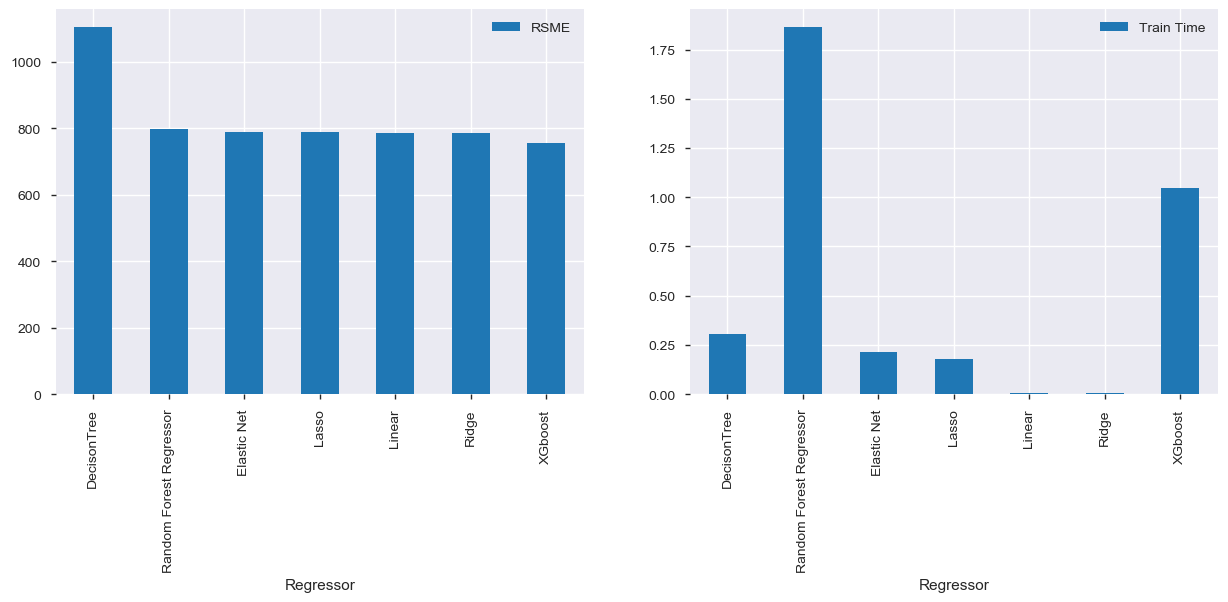

In [1241]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
results.sort_values('RSME', ascending=False, inplace=True)
results.plot(y=['RSME'], kind='bar', ax=ax[0], xlim=[0,1.1])
results.plot(y='Train Time', kind='bar', ax=ax[1])

###### Submission to Zindi

In [1242]:
# train test split
y = merged_df[:len(train_df)][['time_from_pickup_to_arrival']]
x_train = merged_df[:len(train_df)].drop('time_from_pickup_to_arrival',axis=1)
x_test = merged_df[len(train_df):].drop('time_from_pickup_to_arrival',axis=1)

model= xgb.XGBRegressor()
model.fit(x_train , y)
pred = model.predict(x_test)
output = pd.DataFrame({"Order No":test_df['order_no'],
                           "Time from Pickup to Arrival": pred })
output.to_csv("submission_final17.csv", index=False)

[16:53:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Removing outliers

19083/21201 data points remain.


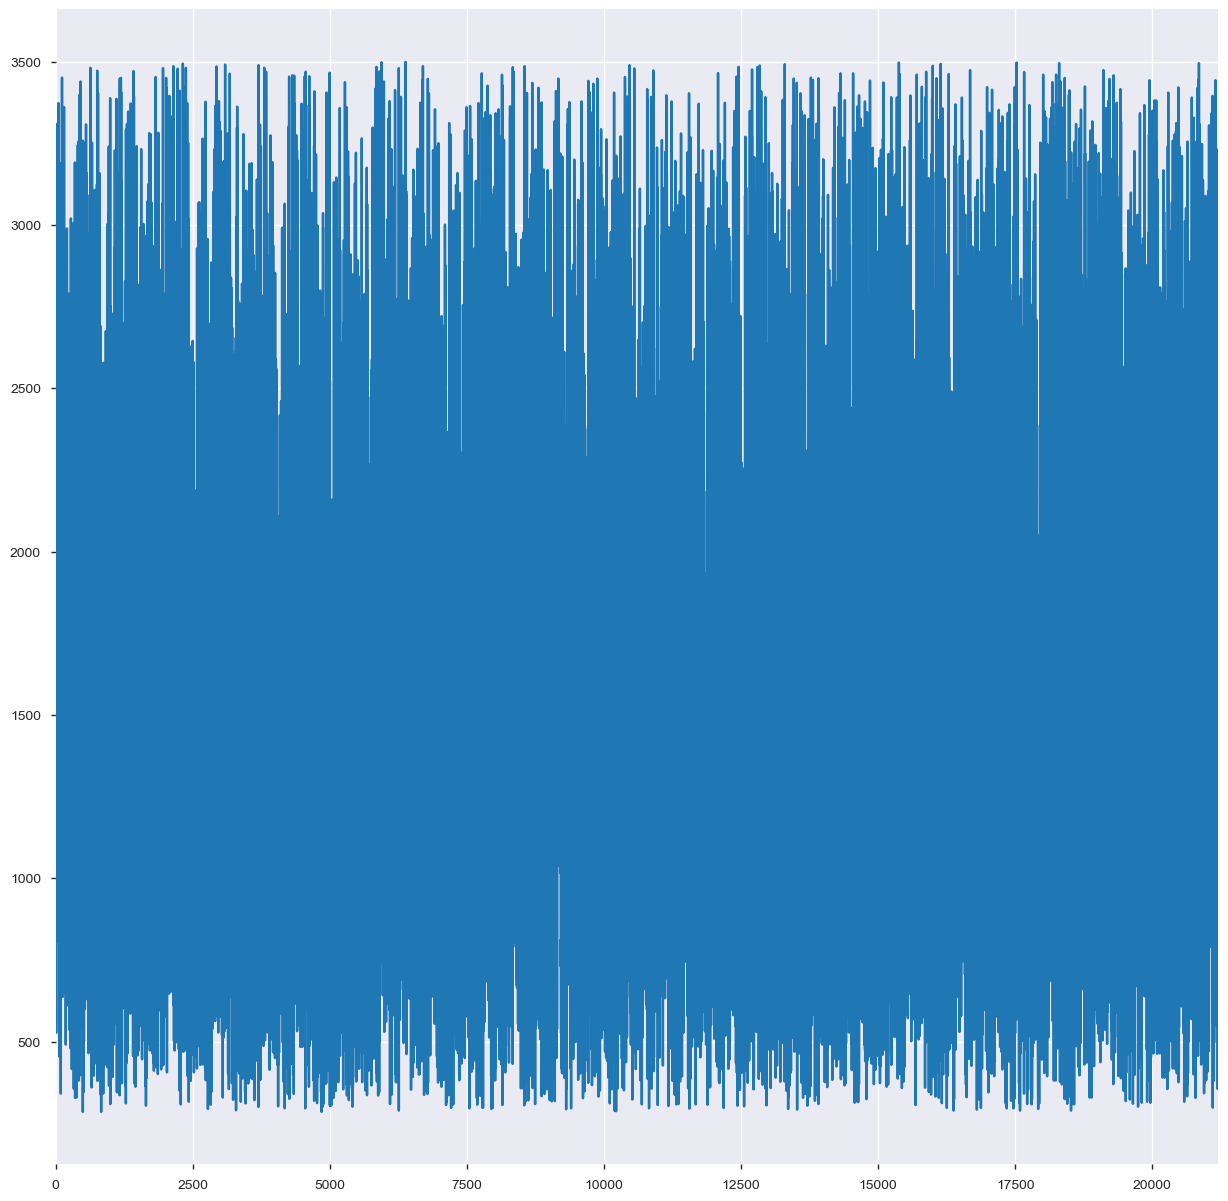

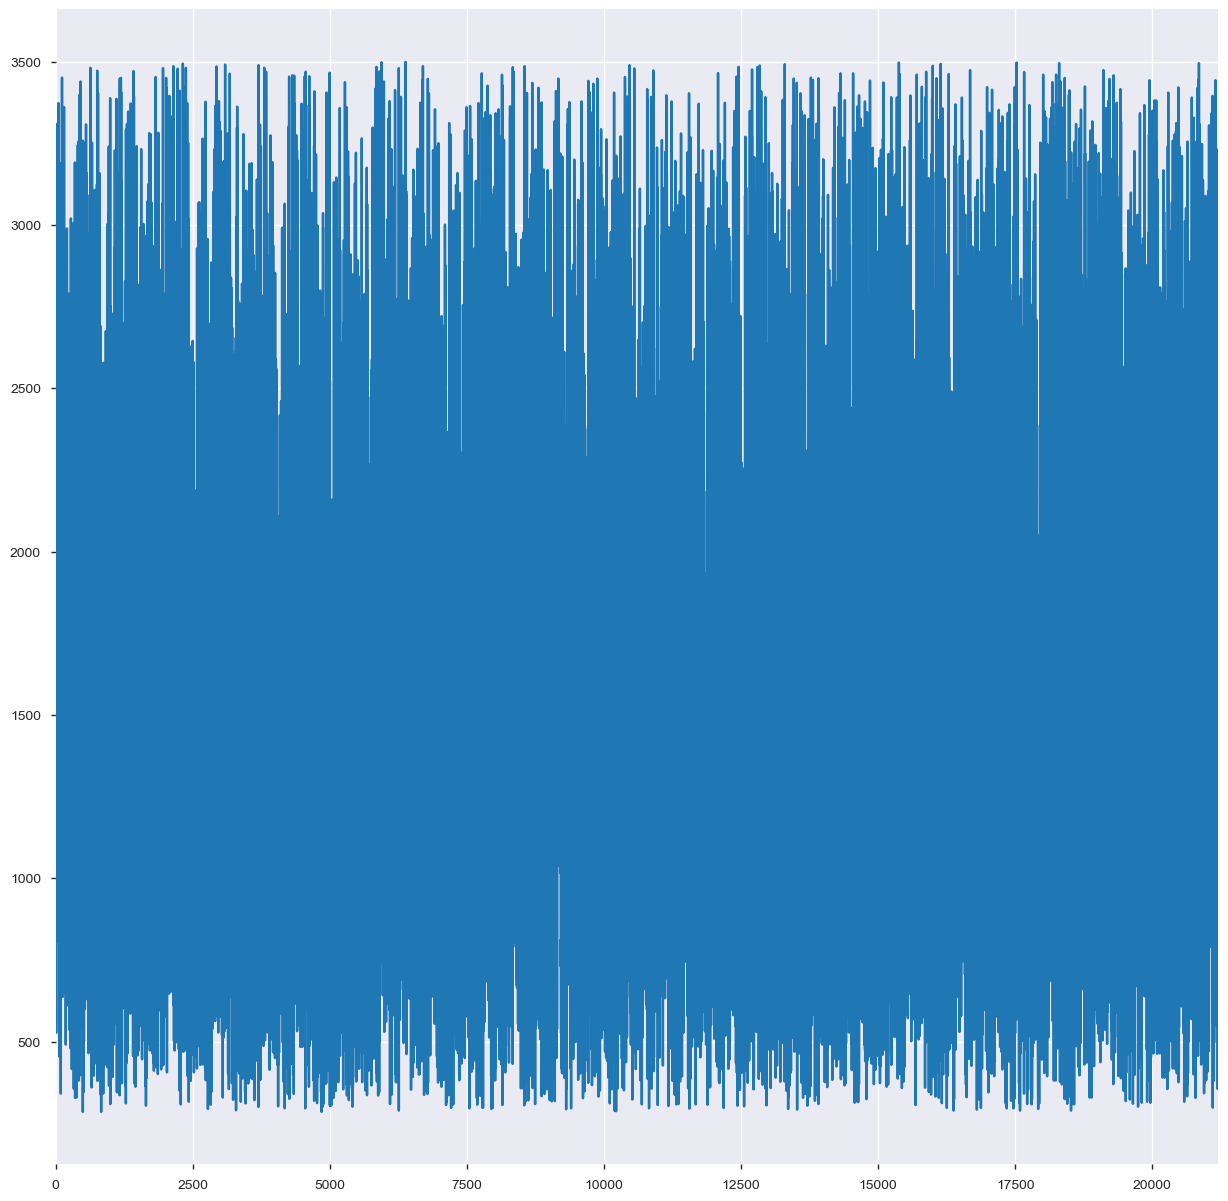

In [1190]:
size= 21201
new_df= merged_df[:len(train_df)] 
y = new_df['time_from_pickup_to_arrival']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))

print(str(y[removed_outliers].size) + "/" + str(size) + " data points remain.") 

y[removed_outliers].plot().get_figure()

In [1191]:
index_names = new_df[~removed_outliers].index 


In [1192]:
new_df.drop(index_names, inplace=True)

######  **Splitting the data**

**Separating the Training dataset into the Independent variable and Dependent variable.**

In [1206]:
# Splitting the baseline_train DataFrame into the X and Y variable using the Pandas .iloc[] method.

Y = new_df[['time_from_pickup_to_arrival']]
X = new_df.drop('time_from_pickup_to_arrival',axis=1)

# for predictions
xtrain = new_df.drop('time_from_pickup_to_arrival',axis=1)
xpred = merged_df[len(train_df):].drop('time_from_pickup_to_arrival',axis=1)

**Splitting the dataset into the training and test set**

In [1207]:
# Using sklearn.model_selection, train_test_split() method to split the baseline_X and baseline_Y.
# Test size will be 0.2 (20% of the data will the test case).

Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, Y, 
    test_size=0.2, 
    random_state=21)

### Multiple models

In [1198]:
results = []
models = {}
for name, reg in zip(names, regressors):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o reg.fit(Xtrain, Ytrain)
    
    print ('... predicting')
    y_pred = reg.predict(Xtest)   
        
    print ('... scoring')
    rsme  = np.sqrt(mean_squared_error(Ytest, y_pred))
        
    # save the results to dictionaries
    models[name] = reg    
    
    results.append([name, rsme, run_time.best])
    
results = pd.DataFrame(results, columns=['Regressor', 'RSME', 'Train Time'])
results.set_index('Regressor', inplace= True)

Fitting Linear model...
... predicting
... scoring
Fitting Lasso model...


C:\Users\Suzzy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 377224238.89637613, tolerance: 792421.540965027

C:\Users\Suzzy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 377224238.89637613, tolerance: 792421.540965027

C:\Users\Suzzy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 377224238.89637613, tolerance: 792421.540965027

C:\Users\Suzzy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 377224238.89637613, tolerance

... predicting
... scoring
Fitting Ridge model...
... predicting
... scoring
Fitting Elastic Net model...


C:\Users\Suzzy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 380348813.66992664, tolerance: 792421.540965027

C:\Users\Suzzy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 380348813.66992664, tolerance: 792421.540965027

C:\Users\Suzzy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 380348813.66992664, tolerance: 792421.540965027

C:\Users\Suzzy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 380348813.66992664, tolerance

... predicting
... scoring
Fitting Random Forest Regressor model...


C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Suzzy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column

... predicting
... scoring
Fitting XGboost model...
[16:17:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
... predicting
... s

In [1199]:
results.sort_values('RSME', ascending=False)

,RSME,Train Time
Regressor,,
DecisonTree,769.017170,0.258206
Random Forest Regressor,574.772198,1.603019
Elastic Net,569.658413,0.233555
Lasso,569.081503,0.188813
Ridge,567.386073,0.006070
Linear,567.362727,0.008203
XGboost,543.269184,0.994166


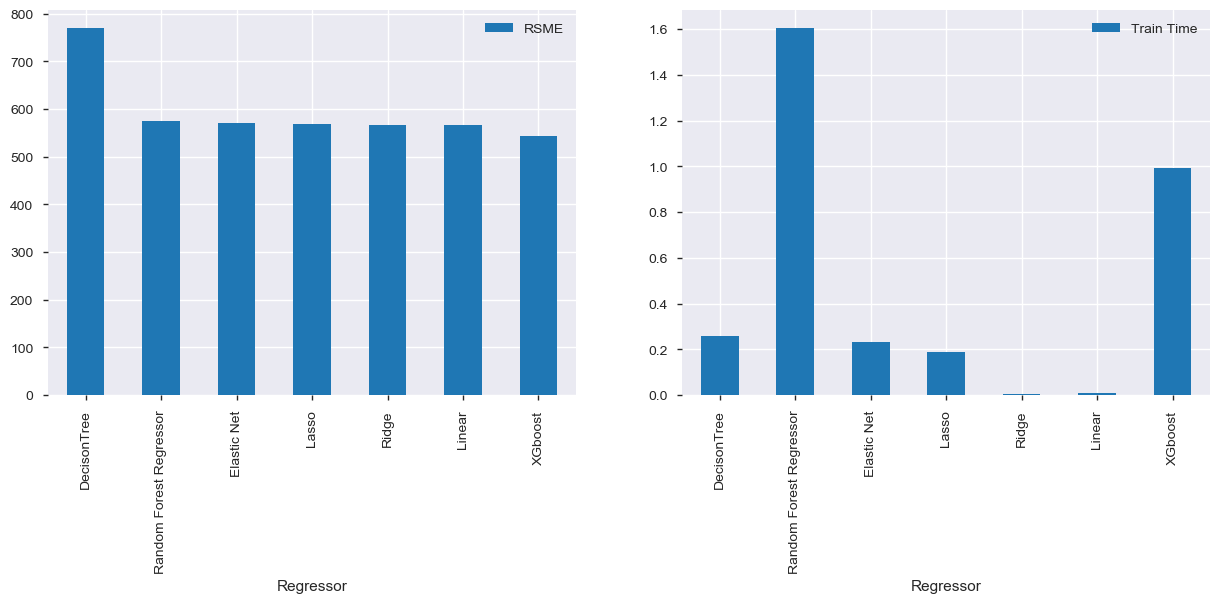

In [1200]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
results.sort_values('RSME', ascending=False, inplace=True)
results.plot(y=['RSME'], kind='bar', ax=ax[0], xlim=[0,1.1])
results.plot(y='Train Time', kind='bar', ax=ax[1])

In [1208]:
eval_set = [(Xtrain, Ytrain), (Xtest, Ytest)]
eval_metric = ["rmse"]
%time model.fit(Xtrain, Ytrain, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[16:23:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1507.53	validation_1-rmse:1522.65
[1]	validation_0-rmse:1378.47	validation_1-rmse:1393.77
[2]	validation_0-rmse:1264.22	validation_1-rmse:1279.73
[3]	validation_0-rmse:1163.42	validation_1-rmse:1179.22
[4]	validation_0-rmse:1074.66	validation_1-rmse:1090.7
[5]	validation_0-rmse:996.937	validation_1-rmse:1013.26
[6]	validation_0-rmse:929.203	validation_1-rmse:945.803
[7]	validation_0-rmse:870.381	validation_1-rmse:887.096
[8]	validation_0-rmse:819.557	validation_1-rmse:836.723
[9]	validation_0-rmse:775.844	validation_1-rmse:793.092
[10]	validation_0-rmse:738.45	validation_1-rmse:755.92
[11]	validation_0-rmse:706.555	validation_1-rmse:724.201
[12]	validation_0-rmse:679.501	validation_1-rmse:697.006
[13]	validation_0-rmse:656.705	validation_1-rmse:674.188
[14]	validation_0-rmse:637.538	validation_1-rmse:654.947
[15]	validation_0-rmse:621.457	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

###### Submission to Zindi

In [1209]:
# train test split
y = new_df[['time_from_pickup_to_arrival']]
x_train = new_df.drop('time_from_pickup_to_arrival',axis=1)
x_test = merged_df[len(train_df):].drop('time_from_pickup_to_arrival',axis=1)

model= xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
model.fit(x_train , y)
pred = model.predict(x_test)
output = pd.DataFrame({"Order No":test_df['order_no'],
                           "Time from Pickup to Arrival": pred })
output.to_csv("submission_final12.csv", index=False)

[16:24:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


The model becomes very good when removing outliers but on Zindi the score increases. This can be due to there being many outliers in the testing set on Zindi